Statistik Deskriptif Dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Cek Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Cek Data Duplikat:
0


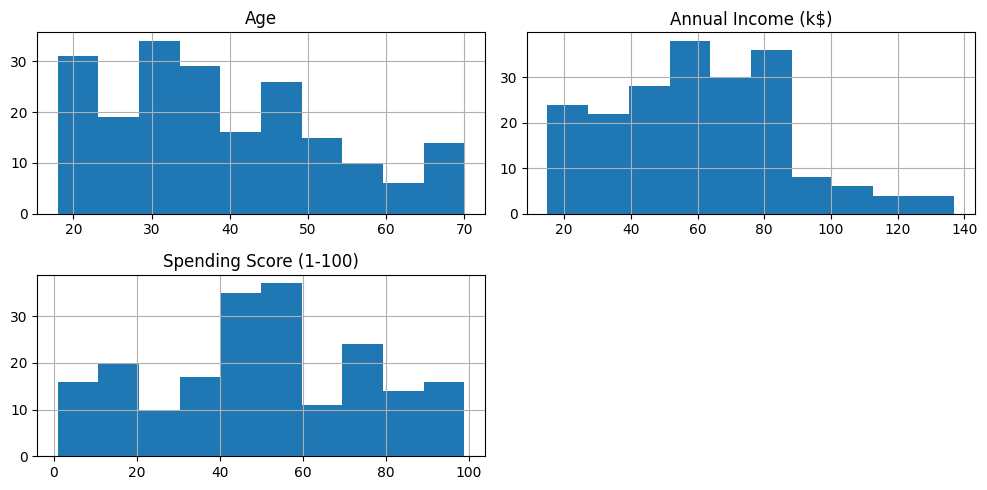

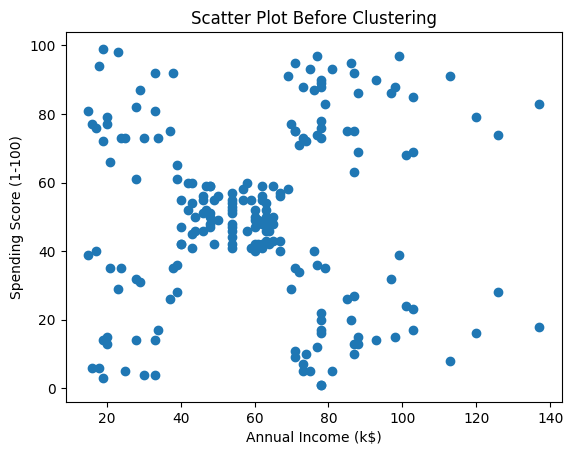

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#1. Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')

# 2. Exploratory Data Analysis (EDA)
# Statistik deskriptif
print("Statistik Deskriptif Dataset:")
print(data.describe())

# Mengecek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# Mengecek duplikat
print("\nCek Data Duplikat:")
print(data.duplicated().sum())

# Visualisasi distribusi atribut
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=10, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Scatter plot awal
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot Before Clustering')
plt.show()

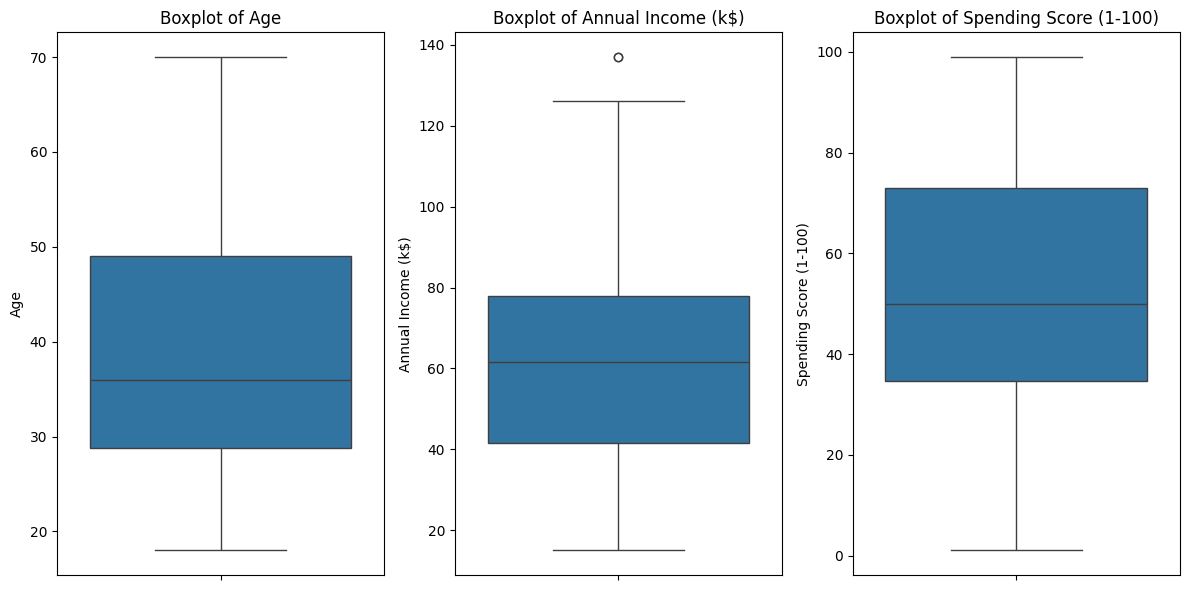

In [ ]:
import seaborn as sns

# Boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

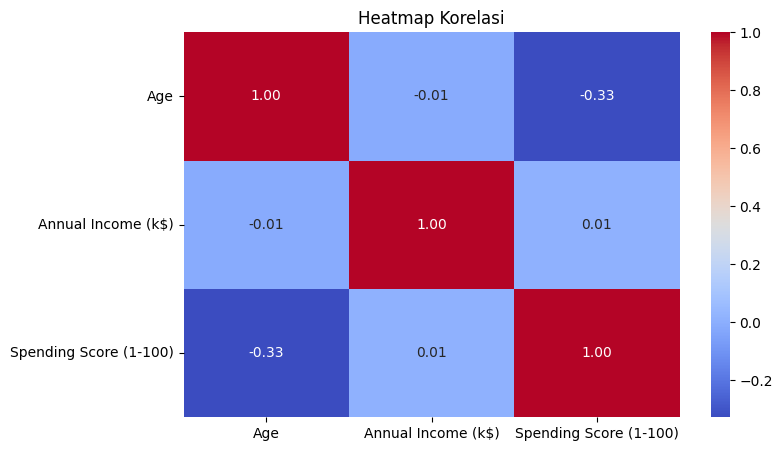

In [ ]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(8, 5))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

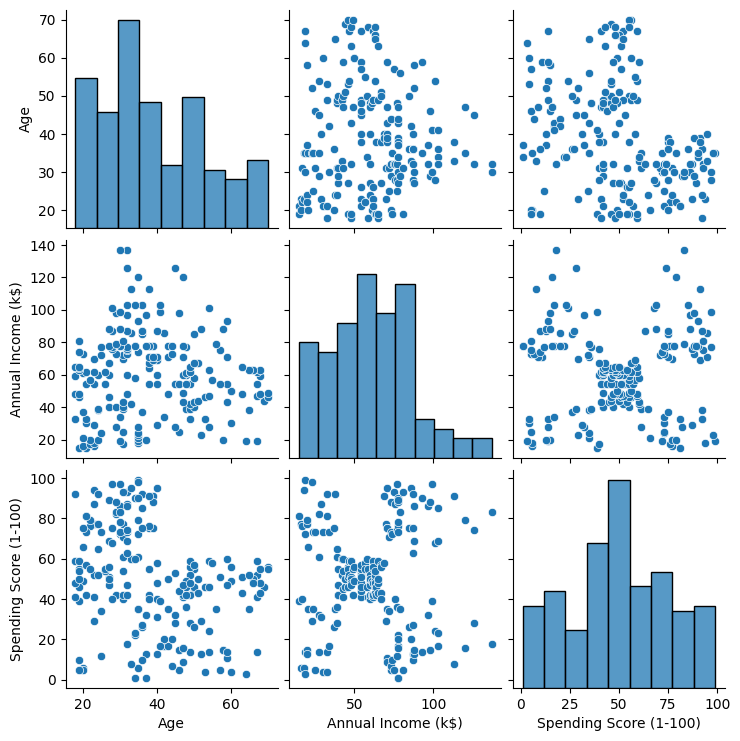

In [ ]:
# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

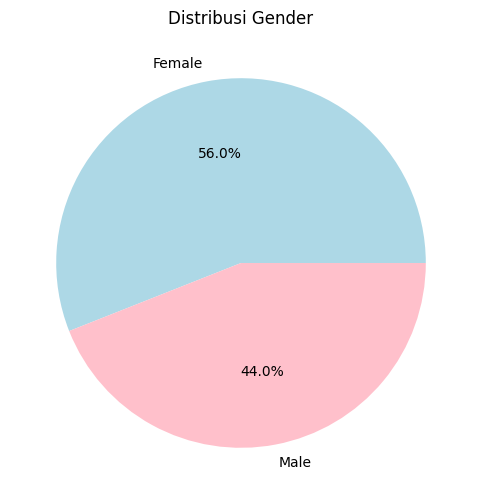

In [ ]:
# Pie chart untuk distribusi gender
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Distribusi Gender")
plt.ylabel("")
plt.show()

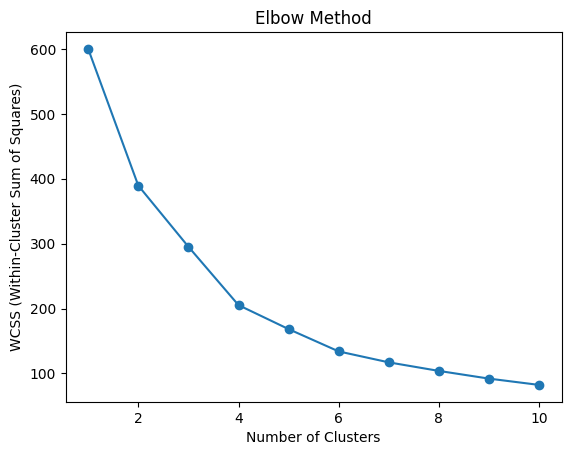

In [ ]:
#3. Preprocessing Data
attributes = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Pilih atribut untuk clustering

# Scaling data
scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)

#4. Metode Elbow untuk Menentukan Jumlah Cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_attributes)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Pilih jumlah cluster berdasarkan hasil Elbow Method
k_elbow = 3

<ipython-input-4-007fe968d43b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes.loc[:, 'Cluster'] = clusters


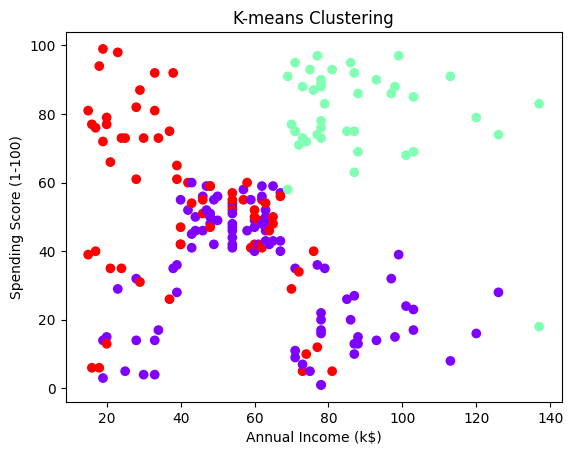

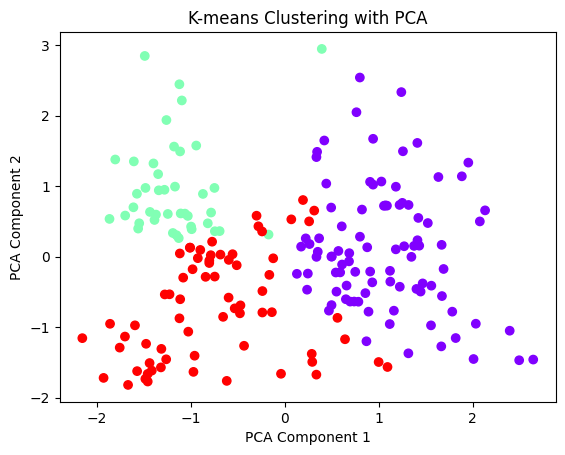


Hasil Clustering:
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        2
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        0
197   32                 126                      74        1
198   32                 137                      18        1
199   30                 137                      83        1

[200 rows x 4 columns]

Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count  91.000000           91.000000               91.000000     91.0
mean   51.274725           61.802198               34.208791 

In [ ]:
# Modelling dengan KMeans
kmeans = KMeans(n_clusters=k_elbow, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_attributes)

# Menambahkan kolom cluster ke dataframe
attributes.loc[:, 'Cluster'] = clusters

#6. Visualisasi Hasil Clustering
# Visualisasi 2D dengan Annual Income dan Spending Score
plt.scatter(attributes['Annual Income (k$)'], attributes['Spending Score (1-100)'], c=attributes['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()

# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_attributes)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Hasil
print("\nHasil Clustering:")
print(attributes)

# Menampilkan pola cluster
for i in range(k_elbow):
    cluster_data = attributes[attributes['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data.describe())